### P2: Investigate a Dataset - Titanic Data
<b>Yuchen Yeh, Sep 2016</b>

### Background:


The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sample data only contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. 

VARIABLE DESCRIPTIONS: <br>
survival:        Survival (0 = No; 1 = Yes)       
pclass:          Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)           
name:            Name; <br> 
sex:             Sex; <br> 
age:             Age; <br> 
sibsp:           Number of Siblings/Spouses Aboard; <br> 
parch:           Number of Parents/Children Aboard; <br> 
ticket:          Ticket Number; <br> 
fare:            Passenger Fare; <br> 
cabin:           Cabin; <br> 
embarked:        Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
                
Reference: https://www.kaggle.com/c/titanic/data

### Questions:

In the sample data set:
-	What is the age distribution of passengers?
-	What is the distribution of fare among the passengers?
-	How passengers are distributed by pclass, sex and embarked?
-	What is the age distribution in each pclass?
-	How many passengers were assigned with cabins?
-   What is the correlation between age and fare?
-	Were passengers aged between 0-14 (infants, toddlers and children) always travelling with parents?

What variables are related to the survival rate:
-	In which life stage did the passengers likely to survive?
-	Does a higher fare lead to a higher survival rate?
-	Which gender is likely to survive?



### Stage 1: Load Data and Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

titanic_filename = 'titanic_data.csv'
titanic_df = pd.read_csv(titanic_filename)

### Stage 2: Investigate the Data

In [2]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.93,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
titanic_df.describe(include='all')

C:\Users\yehy\AppData\Local\Continuum\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Graham, Mr. George Edward",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.712885,0.523008,0.381594,NaN,32.205017,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.529273,1.102743,0.806057,NaN,49.693389,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,7.915000,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,14.450000,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,NaN,1.000000,0.000000,NaN,31.000000,NaN,NaN


<b>Investigation summary in this sample data set:</b>

1) Problematic data: some passengers are associated with a fare value of 0 <br>
2) Missing data: 'Age' data on 177 passengers, 'Embarked' data on 2 passengers*  
3) Not easy to understand 'Embarked' data values <br>
4) Fix the data types: The data type for 'Pclass' should be categorical instead of int <br>

* The passengers that missing Embarked' data would be excluded rather than be wrangled, as it is impossible to wrangle based on the available information.

### Stage 3: Data Wrangling Phase

<b>1) Fix problematic data with 0 fare value</b>

In [5]:
# Identify the passengers with 0 fare value
df = titanic_df[titanic_df['Fare']==0][['PassengerId','Fare']]

#preview first 5 data
df[:5]

,PassengerId,Fare
179,180,0.0
263,264,0.0
271,272,0.0
277,278,0.0
302,303,0.0


In [6]:
# Find out the variables affecting fare prices
# The assumed variables: Pclass, embarked harbor, Whether the passengers in cabin or not
# Calculate a new field 'WithCabin' to identify whether the passengers were assgined with cabins or not
# Use median fare to avoid outliners

titanic_df['WithCabin']= np.where(titanic_df['Cabin'].isnull(), "No" ,"Yes" )
titanic_df.groupby(['Pclass','Embarked','WithCabin']).median()['Fare'].reset_index()


,Pclass,Embarked,WithCabin,Fare
0,1,C,No,61.380
1,1,C,Yes,78.735
2,1,Q,Yes,90.000
3,1,S,No,30.500
4,1,S,Yes,53.100
5,2,C,No,27.720
6,2,C,Yes,13.335
7,2,Q,No,12.350
8,2,Q,Yes,12.350
9,2,S,No,14.000


The result shows 'WithCabin' and 'Embarked' both don't always associate with a higher or lower fare.
 Hence, replacing 0 fare based on different 'PClass' categories is my suggested approach.

In [7]:
# Declaimer: some following code snipets are referenced from  
# https://discussions.udacity.com/t/p2-titanic-data-set-project-unable-to-fix-data-errors-in-fare-column/170554/7
# Create a 'NewFare' column
# Insert the the median of 'Fare' for 'Pclass'

def replace_fare(grp):
    grp['FareNew'] = np.where((grp['Fare'] ==0), grp['Fare'].median(),grp['Fare'])
    return grp

titanic_df = titanic_df.groupby(['Pclass']).apply(replace_fare)

df =titanic_df[((titanic_df['Fare'] ==0))][['PassengerId','FareNew','Fare',]]

#preview first 5 data
df[:5]

,PassengerId,FareNew,Fare
179,180,8.05,0.0
263,264,60.29,0.0
271,272,8.05,0.0
277,278,14.25,0.0
302,303,8.05,0.0


<b> 2) Fix missing 'Age' data </b>

In [8]:
# Identify the passengers with missing age data
df= titanic_df[titanic_df['Age'].isnull()][['PassengerId','Age']]

#preview first 5 data
df[:5]

,PassengerId,Age
5,6,NaN
17,18,NaN
19,20,NaN
26,27,NaN
28,29,NaN


In [9]:
# Declaimer: some following code snipets and ideas are referenced 
# from  https://discussions.udacity.com/t/p2-titanic-data-set-project-unable-to-fix-data-errors-in-fare-column/170554/7
# Create a 'NewAge' column
# Insert the the median of 'Fare' based on Salutation

def reverse_names(names):
    split_name = names.split(",")
    last_name = split_name[0]
    first_name =  split_name[1]
    split_firstname = first_name.split(".")
    first_name_salutation =  split_firstname[0]
    first_name_name = split_firstname[1]
    return first_name_salutation
    
titanic_df['Salutation']=titanic_df['Name'].apply(reverse_names)
    

def replace_age(grp):
    grp['AgeNew'] = np.where((grp['Age'].isnull()), grp['Age'].median(),grp['Age'])
    return grp

titanic_df = titanic_df.groupby(['Salutation']).apply(replace_age)

df=titanic_df[((titanic_df['Age'].isnull()))][['PassengerId','AgeNew','Age',]]

#preview first 5 data
df[:5]

,PassengerId,AgeNew,Age
5,6,30.0,NaN
17,18,30.0,NaN
19,20,35.0,NaN
26,27,30.0,NaN
28,29,21.0,NaN


<b> 3) Replace 'Embarked' data values </b>

In [10]:
# Add a new 'EmbarkedNew' column to display the full name of ports 
titanic_df['EmbarkedNew'] = np.where((titanic_df['Embarked'] =="S"),"Southampton",\
                                     np.where((titanic_df['Embarked'] =='C'), "Cherbourg",\
                                     np.where((titanic_df['Embarked'] =='Q'),"Queenstown",\
                                              titanic_df['Embarked'])))

<b> 4) Fix the data type for 'Pclass'</b>

In [11]:
titanic_df['Pclass']=titanic_df['Pclass'].astype("category")

### Stage 4: Exploration Phase

<b>What is the age distribution of passengers?</b>

            Age     AgeNew
mean  29.712885  29.401235


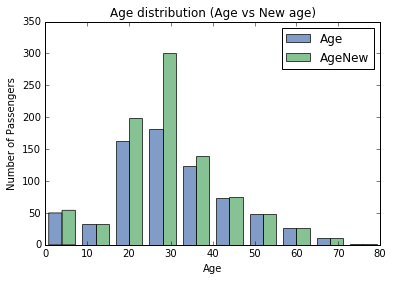

In [12]:
plt.style.use('seaborn-deep')

# create age lists
Age = titanic_df['Age'].tolist()
AgeNew = titanic_df['AgeNew'].tolist()

# calculate average Age
print titanic_df[['Age','AgeNew']].describe().loc[['mean']]

# fare distribution comparison between original age and new age
data1 = np.vstack([Age, AgeNew]).T
plt.hist(data1, bins=10, alpha=0.7, label=['Age', 'AgeNew'])
plt.legend(loc='upper right')
plt.title('Age distribution (Age vs New age)')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()

First of all, the comparison between original age data and the new age data shows most missing age passengers are added to the 30 age group. The average age of the passenger is around 30 years old, and more than half of passengers are aged between 20 and 40.

<b>What is the distribution of fare among the passengers?</b>

           Fare    FareNew
mean  32.205017  32.675443


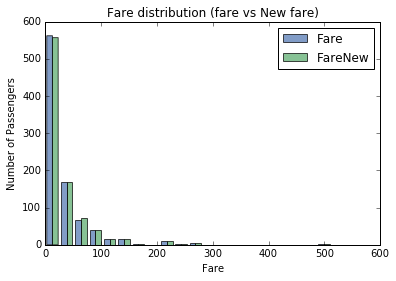

In [13]:
plt.style.use('seaborn-deep')

# create fare lists
Fare = titanic_df['Fare'].tolist()
FareNew = titanic_df['FareNew'].tolist()

# calculate average fare
print titanic_df[['Fare','FareNew']].describe().loc[['mean']]

# fare distribution comparison between original fare and new fare
data = np.vstack([Fare, FareNew]).T
plt.hist(data, bins=20, alpha=0.7, label=['Fare', 'FareNew'])
plt.legend(loc='upper right')
plt.title('Fare distribution (fare vs New fare)')
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.show()

Fare data after wrangeling doesn't seem to affect the distribution. Most of passengers paid under 100 USD, and the average fare is around 33 USD. We also see few passengers paid up to 500 USD.

<b>How passengers are distributed by pclass, sex and embarked?</b>

Sex
female    35.241302
male      64.758698
Name: PassengerId, dtype: float64

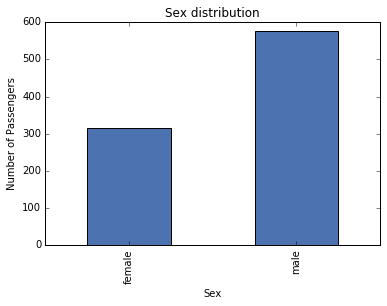

In [14]:
# plort sex distribution histogram
titanic_df2= titanic_df.groupby('Sex').count()['PassengerId']
ax2= titanic_df2.plot(kind='bar')
ax2.set_ylabel('Number of Passengers')
ax2.set_xlabel('Sex')
ax2.set_title('Sex distribution')

# calculate sex percentage
count_all = titanic_df2.sum()
(titanic_df2/count_all) * 100

Approximately 65% passengers are male, so the male is nearly twice as much as female.

Pclass
1    0.242424
2    0.206510
3    0.551066
Name: PassengerId, dtype: float64

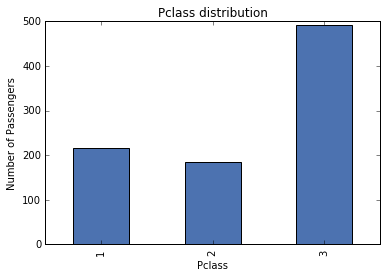

In [15]:
# plort pclass distribution histogram
titanic_df2= titanic_df.groupby('Pclass').count()['PassengerId']
ax2= titanic_df2.plot(kind='bar')
ax2.set_ylabel('Number of Passengers')
ax2.set_xlabel('Pclass')
ax2.set_title('Pclass distribution')

# calculate pclass percentage
count_all = titanic_df2.sum()
titanic_df2/count_all

Almost 500 passengers are from 3rd Class, and 1st Class and 2nd Class have around 200 passengers each.

<b>What is the age distribution in each pclass?</b>

EmbarkedNew
Cherbourg      0.188976
Queenstown     0.086614
Southampton    0.724409
Name: PassengerId, dtype: float64

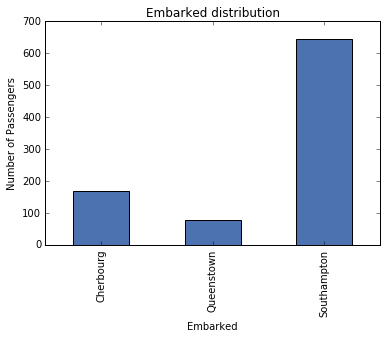

In [16]:
# plort embarked distribution histogram
titanic_df2= titanic_df.groupby('EmbarkedNew').count()['PassengerId']
ax2= titanic_df2.plot(kind='bar')
ax2.set_ylabel('Number of Passengers')
ax2.set_xlabel('Embarked')
ax2.set_title('Embarked distribution')

# calculate embarked percentage
count_all = titanic_df2.sum()
titanic_df2/count_all

Around 70% passengers were boarding via Southampton, and the rest of passengers were from either Cherbourg or Queenstown.

<b>How many passengers were assigned with cabins?</b>

WithCabin
No     0.771044
Yes    0.228956
Name: PassengerId, dtype: float64

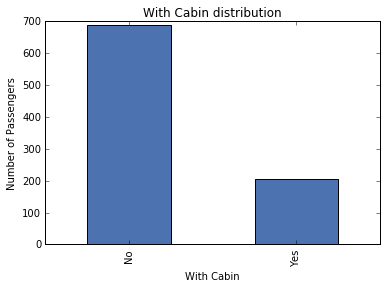

In [17]:
# Group passengers with cabins and without
titanic_df['WithCabin']= np.where(titanic_df['Cabin'].isnull(), "No" ,"Yes" )

# plort WithCabin distribution histogram
titanic_df2= titanic_df.groupby('WithCabin').count()['PassengerId']
ax2= titanic_df2.plot(kind='bar')
ax2.set_ylabel('Number of Passengers')
ax2.set_xlabel('With Cabin')
ax2.set_title('With Cabin distribution')

# calculate WithCabin percentage
count_all = titanic_df2.sum()
titanic_df2/count_all

Around 77% passengers were assigned with cabins and around 28% were without cabins.

<b>What is the age distribution in each pclass?</b>

AgeNew
Pclass                  
1      count  216.000000
       mean    37.312500
       std     14.003514
2      count  184.000000
       mean    29.798913
       std     13.599976
3      count  491.000000
       mean    25.771894
       std     11.125577

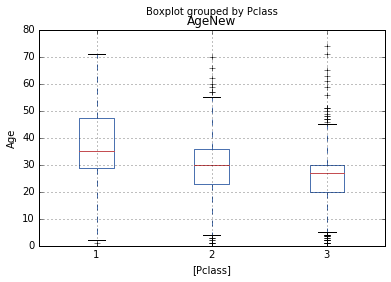

In [18]:
titanic_df.boxplot(column=['AgeNew'], by = ['Pclass']).set_ylabel('Age')
pd.DataFrame(titanic_df.groupby(['Pclass'])['AgeNew'].describe().loc[:,['mean','std','count']])

The average age of 1st Pclass passengers is around 37, much older than the average age of 2nd and 3rd Pclass. The average age of 2nd Pclass passengers is around 30, and for 3rd Pclass the mean age is around 26. Furthermore, the variance for the age of 1st Pclass passengers is also higher, which means the age data points are spread out among 1st Pclass passengers.

<b>What is the correlation between age and fare?</b>

array([[ 1.        ,  0.10112437],
       [ 0.10112437,  1.        ]])

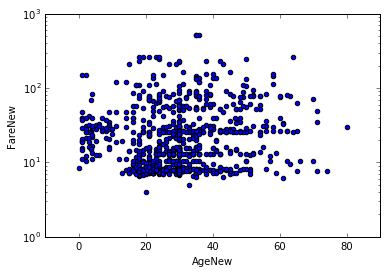

In [19]:
# Use scatter plot to discover the relationship between age and fare
titanic_df.plot(kind='scatter',x='AgeNew', y='FareNew').set_yscale('log')

# determine the correlation coefficient 
np.corrcoef(AgeNew,FareNew)

There is a very little relationship between age and fare, as the coefficient is 0.1.

<b>Were passengers aged between 0-14 (infants, toddlers and children) always travelling with parents? </b>

In [20]:
# Group passengers with parents/children and without
titanic_df['WithParch']= np.where(titanic_df['Parch']<1, "No" ,"Yes" )

# Group age groups by Labels
def cutDF(df):
    return pd.cut(df,[0, 1, 2, 14, 18, 25, 35, 65, 120], labels=['Infant','Toddler', 'Child', 'Teenager', 
                                                                 'Young Adult', 'Adult', 'Middle-Age', 'Senior'])

titanic_df['LabelsNew'] = titanic_df[['AgeNew']].apply(cutDF)

# Select passengers aged between 0 and 14
age14=titanic_df[titanic_df['AgeNew'] < 15]

# Plot the graph 
titanic_df2= age14.groupby(['WithParch','LabelsNew']).mean()['Survived']
age14.groupby(['WithParch','LabelsNew']).count()['Survived']

WithParch  LabelsNew
No         Child         7
Yes        Child        50
           Infant       13
           Toddler      10
Name: Survived, dtype: int64

It's not a surprise to see that infants and toddlers were all travelled with parents. This analysis show 7 children were travelling without parents.

<b> In which life stage did the passengers likely to survive? </b>

     LabelsNew  Survived  PassengerId
0       Infant  0.846154           13
1      Toddler  0.300000           10
2        Child  0.561404           57
3     Teenager  0.403226           62
4  Young Adult  0.383838          198
5        Adult  0.334337          332
6   Middle-Age  0.390476          210
7       Senior  0.125000            8


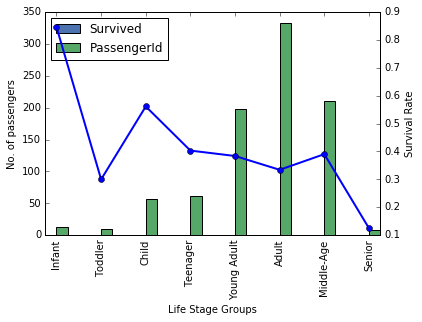

In [21]:
#Disclaimer:https://discussions.udacity.com/t/plotting-bar-graph-with-range/168139,
#http://stackoverflow.com/questions/22635110/sorting-the-order-of-bars-in-pandas-matplotlib-bar-plots

# The average survival rate of passengers group by Llife stage groups
LabelsSurNew = titanic_df.groupby(['LabelsNew']).mean()['Survived'].reset_index()
AgeGroup = ['Infant','Toddler', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Middle-Age', 'Senior']
mapping = {LabelsNew: i for i, LabelsNew in enumerate(AgeGroup)}
keyNew = LabelsSurNew['LabelsNew'].map(mapping)
LabelsSurNew = LabelsSurNew.iloc[keyNew.argsort()]

# Passenger counts group by Llife stage groups
LabelsSur2New = titanic_df.groupby(['LabelsNew']).count()['PassengerId'].reset_index()
AgeGroup = ['Infant','Toddler', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Middle-Age', 'Senior']
mapping = {LabelsNew: i for i, LabelsNew in enumerate(AgeGroup)}
keyNew = LabelsSur2New['LabelsNew'].map(mapping)
LabelsSur2New = LabelsSur2New.iloc[keyNew.argsort()]

p4= pd.merge(LabelsSurNew,LabelsSur2New, on='LabelsNew')
print p4
import matplotlib.pyplot as plt
%matplotlib inline

# the bar plot for life stage groups
axn = p4.plot(kind='bar', x='LabelsNew')
ax2n = axn.twinx() # Create another axes that shares the same x-axis as ax.
ax2n.plot(axn.get_xticks(),p4['Survived'].values, linestyle='-', marker='o', linewidth=2.0,color='blue')

axn.set_ylabel('No. of passengers')
ax2n.set_ylabel('Survival Rate')
axn.set_xlabel('Life Stage Groups')

In [22]:
#determine the standardized score for the survival rate of each age group

def standardize(xs):
    return (xs - xs.mean()) / xs.std()
    
p4['SD'] = standardize(p4['Survived'])

print ' Life Stage Data Set'
print p4

 Life Stage Data Set
     LabelsNew  Survived  PassengerId        SD
0       Infant  0.846154           13  2.025179
1      Toddler  0.300000           10 -0.558471
2        Child  0.561404           57  0.678131
3     Teenager  0.403226           62 -0.070148
4  Young Adult  0.383838          198 -0.161863
5        Adult  0.334337          332 -0.396034
6   Middle-Age  0.390476          210 -0.130462
7       Senior  0.125000            8 -1.386331


Most of the passengers in this data set are young adults, adults and middle-age as shown in the graph: we added most of missing age data to the Adult group in the data wrangling stage. By standardising this data set, it shows the infant group and the child group demonstrate a high survival rate (standard deviation are both positive), whereas senior people mostly died from this incident (a strong negative standard deviation). 

<b> Does a higher fare lead to a higher survival rate? </b>

,FareCutoff,survival_Rate
FareCutoff,1.000000,0.553116
survival_Rate,0.553116,1.000000


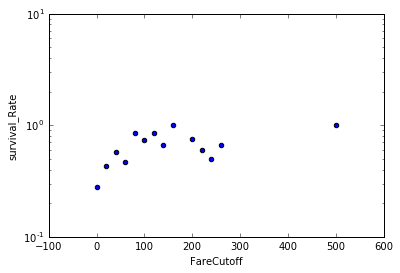

In [23]:
# Create cuts to group fare in the range of 20
cuts = [x for x in range(0, int(np.max(titanic_df.Fare) + 21)) if x % 20 == 0]

# Apply the cuts in the data set
titanic_df['FareCutoff'] = pd.cut(titanic_df['FareNew'], cuts, labels=cuts[:-1])

# Groupby "Survived", "FareCutoff" by counts
titanic_df4 = titanic_df.groupby([ "Survived", "FareCutoff"]).size().to_frame(name = 'count').reset_index()
titanic_df5 = titanic_df4[titanic_df4['Survived']==1] # Counts for the survival passengers
titanic_df6 =titanic_df.groupby([ "FareCutoff"] ).size().to_frame(name = 'count').reset_index() # Counts for total passengers

p5 = pd.merge(titanic_df5,titanic_df6,on='FareCutoff') 
p5['survival_Rate'] = p5['count_x']/p5['count_y'] # create a new metric 'survival rate'

p6=p5.drop(p5.columns[[0, 2, 3]], axis=1) # delete unnecessary columns

# Use scatter plot to discover the relationship between fare and survival rate
p6.plot(kind='scatter',x='FareCutoff', y='survival_Rate').set_yscale('log')

# determine the correlation coefficient 
p6.corr()

From the graph, it shows fare seems to have a positive correlation with the survival rate. However, a dip in the survival rate is seen between fare cutoff of 200-300. It is also notable few data outliners in the fare price of 480-500 as discovered before, and this fare group shows 100% survival rate. To dertermine the relationship between survival rate and fare, deploying Pearson correlation coefficients shows a +0.50 moderate uphill (positive) relationship is discovered between fare pricing and survival rate. However, we can't infer this conclusion in the population data, more statistical tests are required.

<b> Which gender is likely to survive?</b>

In [24]:
# plot the graph for the survival rate between men and women
titanic_df4= titanic_df.groupby('Sex').mean()['Survived']
print titanic_df4

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


Female'survival rate is almost 3 times higher than male's in this data set. To find out if the survival rate between different genders is significant, the chi-squared goodness-of-fit test is utilised. The chi-squared goodness-of-fit test is used to determine whether there is a significant difference between the expected frequencies and the observed frequencies in one or more categories. The test dealing with categorical variables are based on variable counts instead of the actual value of the variables themselves.

Null hypothesis, H0: There is no difference in the survival rate between female and male (H0: μ f = μ m ).  <br>
Alternative hypothesis, H1:There is difference in survival rate between female and male (H1: μ f ≠ μ m ). 

In [25]:
# Disclaimer: some codes are referenced from http://hamelg.blogspot.co.uk/2015/11/python-for-data-analysis-part-25-chi.html

# Create female survived data set
rvs1 =titanic_df[titanic_df['Sex'] =='female']

female_table = rvs1.groupby(['Survived']).count()['PassengerId']

# Create male survived data set
rvs2 =titanic_df[titanic_df['Sex'] =='male']
male_table = rvs2.groupby(['Survived']).count()['PassengerId']

print ("Female survival")
print female_table
print ("Male survival")
print male_table

Female survival
Survived
0     81
1    233
Name: PassengerId, dtype: int64
Male survival
Survived
0    468
1    109
Name: PassengerId, dtype: int64


In [26]:
#In the formula, observed is the actual observed count for each category and expected is 
#the expected count based on the distribution of the population for the corresponding category. 
observed = female_table
male_ratios = male_table/len(rvs2)  # Get male ratios
expected = male_ratios * len(rvs1)   # Get expected counts
print 'expcted counts'
print expected
chi_squared_stat = (((observed-expected)**2)/expected).sum()
print 'chi_squared_stat'
print(chi_squared_stat)

expcted counts
Survived
0    254.682842
1     59.317158
Name: PassengerId, dtype: float64
chi_squared_stat
626.994112101


Note: The chi-squared test assumes none of the expected counts are less than 5.

In [27]:
#The scipy library shorthand for the chi-square distribution is chi2
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 1)   # Df = number of variable categories - 1

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=1)
print("P value")
print(p_value)

Critical value
3.84145882069
P value
0.0


Since our chi-squared statistic exceeds the critical value, we'd reject the null hypothesis that the two distributions are the same. A chi-squared goodness-of-fit test automatically using the scipy function scipy.stats.chisquare():

In [28]:
stats.chisquare(f_obs= observed,   # Array of observed counts
                f_exp= expected)   # Array of expected counts

Power_divergenceResult(statistic=626.99411210101175, pvalue=2.2520440119919079e-138)

Chi-squared statistic value is around 627. For a confidence level of 95%, t critical values are 3.84145882069.
The decision is to reject null hypothesis that the null hypothesis that two distributions are the same.  There is a difference in survival rate between female and male. Due to a positive chi-squared statistic value, so we can infer the female's survival rate is greater than male's survival rate.</b>


<b>Stage 5: Conclusions Phase </b>

We can infer female's survival rate should be different than male's survival rate with a 95% of confidence level because chi-squared statistic value is bigger than t critical value. Due to a positive chi-squared statistic value, we can also conclude that the female's survival rate is greater than male's survival rate.

Some conclusions can be drawn only based on this data set, but not the whole population mean: we see the infant group and the child group demonstrate a high survival rate (standard deviation are both positive), whereas senior people mostly died from this incident (a strong negative standard deviation). The teenage group's survival rate is very close to the average of the whole sample data set, as the standard deviation is very close to 0. The last but not the least, there is a moderate positive relationship between fare pricing and survival rate, which means a moderate uphill trend of survival rate can be discovered if the fare is increased.